In [1]:
import pandas as pd

# Read the data
X = pd.read_csv('../input/housing-prices-competition-for-kaggle-learn-users/train.csv', index_col='Id') 
X_test = pd.read_csv('../input/housing-prices-competition-for-kaggle-learn-users/test.csv', index_col='Id')

print(X.shape)
print(X_test.shape)

#Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
print(X.shape)

#Separate target from predictors (i.e. input features)
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

#Perform ordinal encoding to categorical feature columns 
from sklearn.preprocessing import OrdinalEncoder

# Get the columns that contain strings and treat them as categorical
object_cols = [col for col in X.columns if X[col].dtype == "object"]

# Columns that can be safely ordinal encoded
good_label_cols = [col for col in object_cols if 
                   set(X_test[col]).issubset(set(X[col]))]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))

print('Categorical columns that will be ordinal encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

# Drop categorical columns that will not be encoded
X_train_ordinal = X.drop(bad_label_cols, axis=1)
X_test_ordinal = X_test.drop(bad_label_cols, axis=1)

# Apply ordinal encoder 
ordinal_encoder = OrdinalEncoder() # Your code here
X_train_ordinal[good_label_cols] = ordinal_encoder.fit_transform(X_train_ordinal[good_label_cols])
X_test_ordinal[good_label_cols] = ordinal_encoder.transform(X_test_ordinal[good_label_cols])

#fill missing values in train and test sets using IterativeImputer

from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer 

final_imputer = IterativeImputer(max_iter=3, random_state=0) 

X_train_imputed = pd.DataFrame(final_imputer.fit_transform(X_train_ordinal)) #(6 pts+5 pts)
X_train_imputed.columns = X_train_ordinal.columns
X_test_imputed = pd.DataFrame(final_imputer.transform(X_test_ordinal)) #(6 pts+5 pts)
X_test_imputed.columns = X_test_ordinal.columns #(4 pts + 5 pts)

(1460, 80)
(1459, 79)
(1460, 80)
Categorical columns that will be ordinal encoded: ['Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['SaleType', 'Exterior2nd', 'MSZoning', 'Utilities', 'KitchenQual', 'Functional', 'Exterior1st']


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

import matplotlib.pyplot as plt
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [3]:
from xgboost import XGBRegressor
#Q1

model = XGBRegressor(n_estimators=1000,learning_rate=0.05,n_jobs=-1,random_state=0)

#trained with train set which was preprocessed
model.fit(X_train_imputed,y)
print(model.feature_importances_)

#made predictions with imputed x test

#predictions_1 = my_model_1.predict(imputed_X_test)

[1.92604144e-04 6.21991465e-04 1.69340149e-03 1.01909514e-04
 6.48368965e-04 1.30814500e-03 9.25107300e-03 2.95274222e-04
 2.46543437e-03 2.29112501e-03 1.15036289e-03 1.18165892e-02
 2.08649275e-04 8.63843656e-04 5.56152046e-01 4.91755176e-03
 3.25612701e-03 3.86375980e-03 2.91660312e-04 7.25941092e-04
 8.69409123e-04 6.49534923e-04 1.71763841e-02 5.37110725e-04
 6.24358247e-04 5.18279225e-02 6.27678121e-04 1.72170054e-03
 2.99285678e-03 1.11981072e-02 3.16015008e-04 7.03554950e-04
 5.82503446e-04 1.66898314e-02 2.57784675e-04 4.70100204e-04
 4.55308557e-02 5.60582848e-04 4.36095241e-03 6.87733898e-03
 1.64543802e-04 3.45204920e-02 2.11651693e-03 7.26164610e-04
 5.33087738e-03 1.35046663e-03 4.10751702e-04 2.60249265e-02
 5.26760798e-03 8.94285180e-03 3.25581146e-04 4.86589968e-03
 1.23630022e-03 4.34467103e-03 1.14391752e-01 2.56512547e-03
 3.92910279e-03 2.71652080e-03 8.71347438e-04 6.46666798e-04
 1.45812589e-03 8.07798933e-04 4.03229846e-04 4.09420521e-04
 3.34227184e-06 1.333682

In [4]:
#Q2
feature_importance_series = pd.Series(model.feature_importances_, name="Feature Importance", index=X_train_imputed.columns)
feature_importance_series = feature_importance_series.sort_values(ascending=False)

In [5]:
#Q3
def plot_feature_importances(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Feature Importance Scores from XGBRegressor")

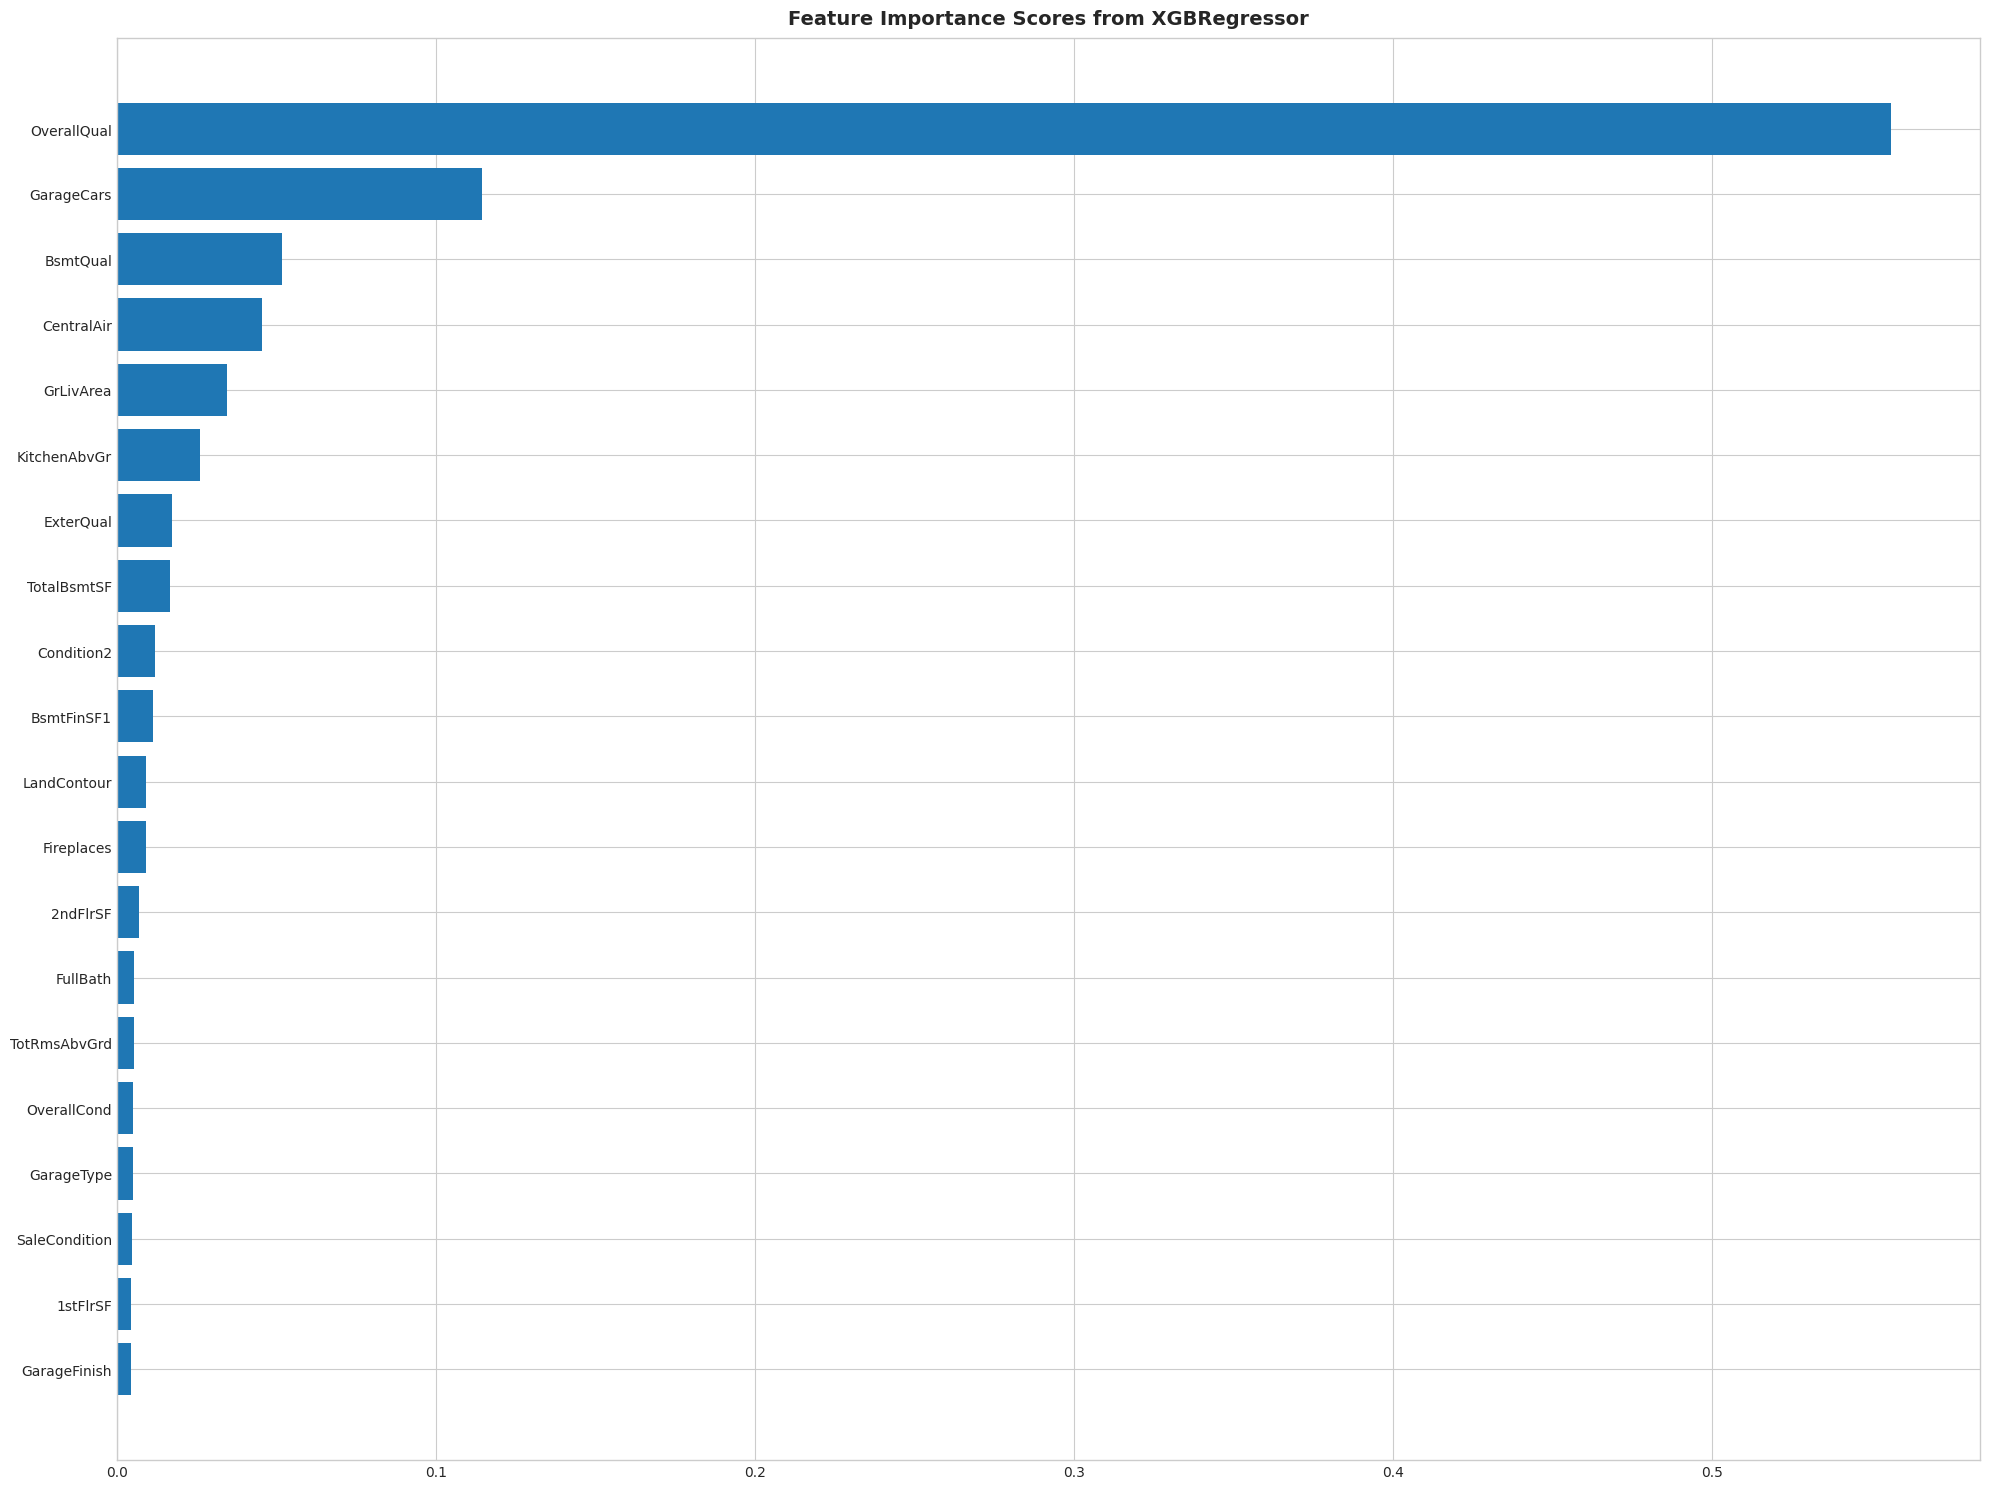

In [6]:
plt.figure(dpi=100, figsize=(20, 15))
plot_feature_importances(feature_importance_series.head(20))

In [7]:
#Q4
feature_importance_df = pd.DataFrame({
                       'importance': model.feature_importances_}).set_index(X_train_imputed.columns)
feature_importance_df = feature_importance_df.sort_values(by=['importance'], ascending=False)

In [8]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
#Q5
def score_dataset(X_train_imputed,y,feature_importance_df,n_features):
    features_selected = feature_importance_df.head(n_features).index
    X_train_selected = X_train_imputed[features_selected]
    model = XGBRegressor(n_estimators=1000,learning_rate=0.05,n_jobs=-1,random_state=0)
    scores = -1 * cross_val_score(model,X_train_selected, y,
                              cv=3,
                              scoring='neg_mean_absolute_error')
    return scores.mean()

In [9]:
#Q6
candidate_n_features = [10,20,30,40,50,60,72]



small_mae2 = 100000000
small_n_features = 0


for n_feat in candidate_n_features:
    my_mae =score_dataset(X_train_imputed,y,feature_importance_df,n_feat)
 
    print("n_features: {}   \t\t Mean Absolute Error:  {}".format(n_feat ,my_mae))
    if my_mae < small_mae2 :      
            small_mae2 = my_mae
            small_n_features = n_feat



best_n_features = small_n_features
best_mae2 = small_mae2 
print("Best n_features size is: {}   \t\t Best Mean Absolute Error:  {}".format(best_n_features,best_mae2))

n_features: 10   		 Mean Absolute Error:  20112.72754101825
n_features: 20   		 Mean Absolute Error:  17878.244533661815
n_features: 30   		 Mean Absolute Error:  16381.812836119288
n_features: 40   		 Mean Absolute Error:  16022.24953853672
n_features: 50   		 Mean Absolute Error:  16393.94024280205
n_features: 60   		 Mean Absolute Error:  16342.98693005013
n_features: 72   		 Mean Absolute Error:  16438.269921156516
Best n_features size is: 40   		 Best Mean Absolute Error:  16022.24953853672


In [10]:
#Q7
features_selected = feature_importance_df.head(best_n_features).index
X_train_selected = X_train_imputed[features_selected]
X_test_selected = X_test_imputed[features_selected]

In [11]:
model2 = XGBRegressor(n_estimators=1000,learning_rate=0.05,n_jobs=-1,random_state=0)

model2.fit(X_train_selected,y)

predictions2 = model2.predict(X_test_selected)

In [12]:
#Q8
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': predictions2})
output.to_csv('submission2.csv', index=False)

Score= 14943.00916

In [13]:
#Q9
from lightgbm import LGBMRegressor

model3  =LGBMRegressor(n_estimators=100,learning_rate=0.05,n_jobs=-1,random_state=0)

model3.fit(X_train_selected,y)

predictions3 = model3.predict(X_test_selected)

In [14]:
#Q10
output2 = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': predictions3})
output2.to_csv('submission_3.csv', index=False)

Score: 14871.62897

In [15]:
#Q11
preds_average = (predictions2+predictions3) / 2

In [16]:
#Q12
output3 = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_average})
output3.to_csv('submission_4.csv', index=False)

Score: 14591.46470

In [17]:
from sklearn.preprocessing import MinMaxScaler
#Q13
scaler = MinMaxScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

model4 = XGBRegressor(n_estimators=1000,learning_rate=0.05,n_jobs=-1,random_state=0)
model4.fit(X_train_selected_scaled,y)
predictions4 = model4.predict(X_test_selected_scaled)



Actually differnce between scores are too small so I dont think that we can say that one performs better than the other. It might be because of dataset but as I said, in a situation like this, we  cannot say one performs better than the other.

In [18]:
output4 = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': predictions4})
output4.to_csv('submission_5.csv', index=False)

Score: 14949.32209

Q14:

This is about data leakage problem. In data leakage chapter, we saw that if we do preprocessing of data before calling train_test_split, our dataset corrupts and it might give high validation accuracy but when we make real predictions, our model works poorly. 
So, my answer is, we should first split our dataset as train and test, then we should preprocess our data.